In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# * 데이터 크기/ 상황 
# -> 가벼울 땐 pandas 사용 무거우면 대용량 :PySpark, DASK etc 사용

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 모델 생성 : 생성 여부에 대한 예측

1) 결측값이 없어야 함 ! -> 제거, 채울 값
2) 숫자가 아닌 데이터를 꼭 숫자화(인코딩)

### 1) 결측값 확인 후 채우기

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
for col in data.columns:
    print(str(col)+":", data.loc[:,col].isnull().sum()/len(data))

PassengerId: 0.0
Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 0.19865319865319866
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 0.7710437710437711
Embarked: 0.002244668911335578


<Axes: ylabel='Frequency'>

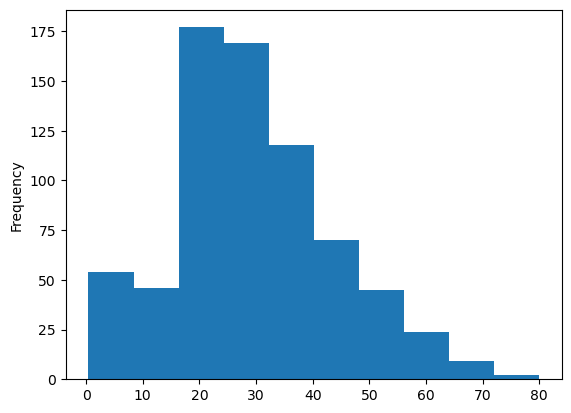

In [16]:
# Age cloumn

data["Age"].plot(kind = "hist")

In [17]:
# 현실적인 문제 : 누락된 20퍼센트의 데이터를 어떻게 할까?
# ==> 분석자가 타당하게 이유들과 방법들을 제시해야 함!!!!
# 예) 중요한 변수가 아니라고 생각하면,,,,,나이변수 제거하자!!!!
#     ---> 많은 데이터가 소실될 수 있음....특징이 중요...
# ==> 채우자고 결정!!!!!
#     어떻게 채울것인가??(정답은 없음!!!!)
#     --> 가장 편한 방법 : 임의의 값으로 채운다 9999,99, 0, -1 etc
#                          대표값으로 채운다 : 평균, 중간값, 최빈값 etc
#     --> 결측값을 예측하는 모델을 만들어서 예측값으로 할 수도 있음...
#     --> 외부 데이터를 참조(대회 규정을 참고, 고객의사)
#     --> 유사한 데이터를 모아서(그룹, 묶음): 대표값 ==> knn
#     etc.... 공식적인 부분은 없음!!!!
#     시도의 영역// 하는 도메인에서 주로 하는 방식 // etc

In [18]:
# 수업 진행은 편히 하기 위해서 : 대표값으로 처리...
# 결정 ) 직접 age컬럼의 누락된 값은 채우자!! & 평균대표값
# ==> 분포를 보니, 적당히 평균을 해도 괜찮을 것 같아서 평균 결정!!!!
data.loc[:,"Age"].fillna(data["Age"].mean(), inplace=True)

In [19]:
# --> 누락된 데이터가 잘 처리가 되었는지 체크
data.loc[:,"Age"].isnull().sum()


0

In [22]:
# --> Cabin/ Embarked의 값을 채우자라고 결정!!!
# ===> 정보 없음을 나타내는 대표값으로 채울려고 함 N
data.loc[:,"Cabin"].fillna("N",inplace=True )
data.loc[:,"Embarked"].fillna("N",inplace=True )

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 범주형 인코딩하기

In [36]:
# 잠시) 인코딩중에서 대표적인 방법 : 라벨인코딩, 원핫인코딩 ,,,,etc
# 성별 : 남자/여자, female/male, f/m, F/M
# 학교 : 초등, 중등, 고등, 대학,,,

# --> 라벨 인코딩 : 유니크한 종류에 정수값을 부여를 함
# 성별 : 남자/ 여자 --> 유니크한 종류의 사전 순서
#        남자0, 여자1
# 학교 : 초등, 중등, 고등, 대학
#        고등0, 대학1, 중등2, 초등3
#        ==> 임의로 순서를 조정해서
#        초등0, 중등1, 고등2, 대학3
# --------> 개별 종류값을 정수로 변환!!!!!

# --> 원핫인코딩 : 해당하는 고유값인지/아닌지(0/1)
# 성별 --> OHEnc ---> 성별_남자,   성별_여자
# 남자                    1            0
# 여자                    0            1
# --> 종류가 국가 같이 100개국 이상인 경우
#     기계 적으로 OHEnc 컬럼이 100개가 옆으로 확장
#     & 대부분의 값이 거의 0
#     ==> 희소행렬( 행렬의 사이즈는 큰데, 값은 대부분 0)
#     ==> 역행렬 X , 종속적인 관계여서 연산 잘 안 됨!!
#         (장바구니분석, 언어에 대해서 인코딩)
#     ==> 연산이 잘 안 되어서,,결과가 그닥.....

# 주어진 벡터 사이즈로 제한을 하고, 확률값으로 처리를 한
# word2vec 와우!!!!!!모델로 언어를 처리하는 전환!!!!!

In [38]:
items = ["TV","냉장고","세탁기","TV","냉장고"]
items

['TV', '냉장고', '세탁기', 'TV', '냉장고']

In [39]:
# scikit - learn의 기본 움직임은 다 모델화!!!!
# ---> 변환에 대한 룰을 학습해서 적용한다!!!!!
label_enc = LabelEncoder()

# 실제 데이터르 주면서,,룰을 학습을 시킴
label_enc.fit(items ) # 단순 룰을 체크.....

# 구체적으로 찾은 룰을 기반으로 값을 변경.. transform
label_encs = label_enc.transform( items)
label_encs

array([0, 1, 2, 0, 1])

In [40]:
# 귀찮아서,,한 번에 룰을 체크 & 변환까지 하자
label_enc.fit_transform( items )

array([0, 1, 2, 0, 1], dtype=int64)

In [41]:
label_enc.classes_

array(['TV', '냉장고', '세탁기'], dtype='<U3')

In [42]:
#### 현실적인 문제는
#### Test데이터 셋에서 갑자기 나타나는 unseen data Problem
test_items = ["TV","세탁기","세탁기","스타일러"]
test_items

['TV', '세탁기', '세탁기', '스타일러']

In [43]:
# 새로운 거 들어오면 에러남!
label_enc.transform( test_items)

ValueError: y contains previously unseen labels: '스타일'

In [44]:
# Step1) 기존 변환 룰을 가지고 와야 함!!!!
#         train_data에서 체크된 룰
label_enc = LabelEncoder()
label_enc.fit(items)
prev_classes = list(label_enc.classes_)
prev_classes
# --> train데이터의 변환은 문제가 없음..

# Step2) test : unseen data를 생각하면서,,,코드화!!!
#  ==> 새로운 종류가 튀어나오면 어찌할지 예외 처리...
for label in np.unique( test_items):
    if label not in prev_classes:
        # 새로운 듣도 보지 못한 new --> unseen data :새로운 룰 추가
        prev_classes.append( label)
prev_classes # ==> test에서 새로운 값이 나타나면,,학습과 별개의 값을 부여하도록 코드화..

# Step3) 새로운 추가된 룰을 생성
label_enc.classes_ = np.array( prev_classes )

# Step4) 새로운 추가된 룰에 따라서 변경
label_enc.transform( test_items)

array([0, 2, 2, 3])

In [45]:
# 참고) 원핫인코딩!!! 종류를 옆으로 펼쳐서 0/1로 표현!!!!
# ==> scikit-learn은 조금 불편하게 되어 있음!!!!
#     + pandas의 get_dummies() 메서드로 사용을 함...
# ==> 1단계 : 라벨인코딩 --> 2단계 : 원핫인코딩..,
# +++++ 딥러닝의 분류를 문제를 할 때 원핫인코딩으로 해야할 때도 있고,,,
#       loss를 다른 것을 써서,,라벨인코딩으로 된 것으로 할 수도 있고,,,


In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [47]:
print("원본데이터:", items)
label_enc = LabelEncoder()
label_enc.fit(items)
label_items = label_enc.transform( items)
print("라벨인코딩:", label_items)
# +++ 원핫인코딩...
oh_enc = OneHotEncoder() # 2D로 핸들링을 함...
oh_enc_items = label_items.reshape(-1, 1) # 2D의 컬럼벡터화....
# --> DL에서 데이터셋들 처리할 때 많이 활용!!!
#     DL에서 이 부분을 잘 못 하게 되면,,,내 코드 안 도는 일이 주로..
#     모양을 제대로 처리를 안 하면 에러가 발생을 함!!!!
oh_enc.fit_transform(oh_enc_items ).toarray()

원본데이터: ['TV', '냉장고', '세탁기', 'TV', '냉장고']
라벨인코딩: [0 1 2 0 1]


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# ++++ 누락데이터 & 인코딩 : 필수
# opt) 정규화(숫자값을 다른 숫자값으로 변경): 0~1, 평균0 etc
# ===> ML에서 사용하는 모델이 대부분 Tree모형...
#      Tree 변수값이 중요할 까요??????
#      전통적인 회귀 모형들은 좀 영향력이 큰데,,,
#      트리 기반의 모형들은 정규화의 영향력이 그렇게까지는...
# +++ 시간적인 여유가 있거나, 좀 더 성능을 더 올려야 할 때
#     고민을 할 수 있지 않을까 함...


In [ ]:
# +++ 전처리에 대한 부분을 함수로 만들어서 처리를 하겠음!!!
# step1) 누락 데이터 채우기/ 처리
# step2) 불필요한 컬럼은 제거..
# step3) 숫자가 아닌 컬럼 --> 숫자화 인코딩
# +++ 정규화

In [ ]:
# 전처리 과정 : 함수나 클래스 정도 생성
# 반복적으로 해야하는 과정임 : pipline

In [29]:
# step1 )누락딘 데이터 처리
# 컬럼) age, cabin, embarked
# 입력) df
# 출력) 위의 3개 컬럼을 누락 데이터 채우기! => 채워진 df

def check_fillna(df):
    #누락된 데이터 채우기 -> 분석자 판단에 따라 결정
    df.loc[:,"Age"].fillna(df.loc[:,"Age"].mean(), inplace =True)
    df.loc[:,"Cabin"].fillna("N", inplace =True)
    df.loc[:,"Embarked"].fillna("N", inplace =True)
    df.loc[:,"Fare"].fillna(0, inplace =True)

    return df


# Step2 ) 불필요한 컬럼 제거! -> 모델 입력시 불필요한 컬럼 제거 후 전달
def drop_feature(df):
    # 생존 여부와 상관 없는 이름, id, ticket, 
    # drop + axis = 0/1
    df.drop(["PassengerId", "Name", "Ticket"], axis = 1, inplace = True)
    return df


# step3 ) 숫자가 아닌 컬럼을 숫자로 변경
# test 에서  unseen data 를 고민해야한ㅁ.
def encode_features(df):
    # cabin 은 라벨 인코딩을 하면 종류가 너무 많음
    # eda, 도메인 특성 종류를 재 정리 해야함
    df.loc[:, "Cabin"] = df.loc[:, "Cabin"].apply(lambda x: str(x))

    # -> 라벨 인코딩
    cols = ["Cabin", "Sex", "Embarked"]
    
    # 순서 무시하고 처리할 거임.
    # test 의  unseen data 는 생략하고 처리할 거임
    for col in cols:
        le = LabelEncoder()
        le.fit(df.loc[:,col])
        df.isetitem(df.columns.get_loc(col), le.transform(df.loc[:,col]))
        # df.loc[:,col] = le.transform(df.loc[:,col])
        # 참고 : fit_Transform 한 번에 할 수도 있음
    return df


# 전처리 하는 함수를 모아서 다시 함수화함
def titanic_preprocessing(df):
    df = check_fillna(df)
    df = drop_feature(df)
    df = encode_features(df)

    return df

In [30]:
#문제지와 정답지가 혼제할 때 분리!
y_titanic = data.loc[:, "Survived"]
X_titanic = data.drop("Survived", axis = 1)
# 참고) inplace를 안 한 이유 : 원본을 살려둬서 하기 위해... 원본 크면 메모리 낭비가 단점...

In [31]:
X_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# 함수 처리
X_titanic = titanic_preprocessing(X_titanic)

In [35]:
X_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,146,3
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,146,3
3,1,0,35.0,1,0,53.1000,55,3
4,3,1,35.0,0,0,8.0500,146,3


In [36]:
X_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


### 데이터 분리 (train_test_split)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y_titanic.value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [40]:
X_train, X_val, y_train, y_val = train_test_split(
    X_titanic, y_titanic,
    test_size = 0.2,
    random_state = 1234
)

In [45]:
# 1) 일반적인 k-fold
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, random_state =1234, shuffle = True)
kfold

KFold(n_splits=5, random_state=1234, shuffle=True)

In [47]:
# 2) 비율을 유지하는 strafied k-fold
from sklearn.model_selection import StratifiedKFold
str_kfold = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
str_kfold

StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

In [43]:
# 3) 복원추출을 사용하는 repeated k-fold
from sklearn.model_selection import RepeatedKFold
rkold = RepeatedKFold(n_splits= 5, random_state = 1234, n_repeats = 10)

In [ ]:
# 4) 비율 유지 & 반복 repeated strafied k-fold


### 모델 선택

In [48]:
# 1) 개별 보델에 대한 대략적인 성능 체크 Baseline
# 2) 개별 모델에 대한 성능을 끌어올려야 함 HPT
#     -> RandomGridSearchCV : 크게 추리는 것...
#     -> GridSearchCV : 디테일하게 탐색
#       최근) bayseian opt -> GridSearchCV 최적을 찾기도 함
#       ++ 효율성 : baysian에서 큰 범위로 세팅!
#       ++ 여러 플랫폼이 존재를 함.
# 3) 실제 모의 평가 진행 : 모델 성능 체크 -> 개별 모델에 대한 성능 최적화가 되었는지 체크
#     -> 성능이 별로인 경우 : 2~3번 돌아가켠서 체크 -> 최적의 성능 끌어내기
# 4) 최종 모델 선택 
#     -> 4-1) 시도한 모델 중 best선정
#     -> 4-2) 여러 모델 종합 voting
#         (hard voting, soft voting)
        # ++ many & diversity
#     -> 4-3) stacking (대회 한정) 재학습

In [56]:
# 모델 학습과정에서 필요한 모듈
from sklearn.model_selection import cross_val_score

# 평가하기
from sklearn.metrics import accuracy_score

# 3) HPT :시간적인 부분이 많이 소요
# -> 직접 다 체크 : gridsearch + CV

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# +optuna 외부 pkg  경우는 HPT 을 하는 것과 최종모델을 다시 학습


### 1) knn모델

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_jobs= -1)

In [62]:
scores = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = "accuracy")
scores

array([0.72027972, 0.72027972, 0.66901408, 0.76760563, 0.68309859])

In [63]:
for iter_count, acc in enumerate(scores):
    print(f"knn의 {iter_count}시도 acc : {acc}")
print("knn의 모델의 acc mean :", scores.mean())
print("knn의 모델의 acc std:", scores.std())

knn의 0시도 acc : 0.7202797202797203
knn의 1시도 acc : 0.7202797202797203
knn의 2시도 acc : 0.6690140845070423
knn의 3시도 acc : 0.7676056338028169
knn의 4시도 acc : 0.6830985915492958
knn의 모델의 acc mean : 0.7120555500837191
knn의 모델의 acc std: 0.034386505953867816


In [64]:
# RGS/GS 매번 시행이 독립적
# bayeisan 과거 시행의 결과를 활용해서 next

# RGS : 1) 테스트할 파라미터의 조합들 중에서, 임의로 선택
# -> 테스트할 종류가 엄청 많을 때 사용이 가능함
# -> 범위를 좀 좁힐 때 사용할 수 있음
# 참고) sikitlearn에서 변질이 되었음


In [69]:
parameters = {
    "n_neighbors" :[1,3,5,7,9,11,15,17,19], #test 할 값 리스트 나열 : 컴프리핸션 등 사용 가능
    "algorithm" : ["auto" , "ball_tree", "kd_tree"]
}

In [71]:
# RGS
# 1) 사용할 모델 : HW성능 관련된 것은 기본으로 성능!!
knn = KNeighborsClassifier(n_jobs=-1)
# 2) 몇 번을 탐색할 것인가!!!!!dk 
n_iter = 10 # ( test할 파라미터 조합보다 경우의 수가 작은면 에러..)
# 3) RGSV 세팅 : 마치 모델!!!!
knn_kf_rgs = RandomizedSearchCV(
    knn,
    # test할 파라미터들...
    param_distributions= parameters,
    cv = kfold,
    scoring = "accuracy",
    n_jobs = -1,
    random_state=1234,
    n_iter = n_iter
)

# 4) 실제 데이터를 밀어 넣어서 학습
knn_kf_rgs.fit(X_train, y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 15,
                                                        17, 19]},
                   random_state=1234, scoring='accuracy')

In [72]:
#  RGSCV에 실제 수행 결과 : 로그표
knn_kf_rgs.cv_results_

{'mean_fit_time': array([0.01343455, 0.00891433, 0.00841818, 0.00672297, 0.01314616,
        0.00697937, 0.0058661 , 0.00607543, 0.00628119, 0.00655932]),
 'std_fit_time': array([0.0052341 , 0.00115386, 0.00148552, 0.00070083, 0.00848151,
        0.00154108, 0.00054727, 0.00025294, 0.00062363, 0.00078498]),
 'mean_score_time': array([0.12781825, 0.06166806, 0.04597111, 0.07260618, 0.07479973,
        0.05087981, 0.03938313, 0.0357604 , 0.03979344, 0.03319201]),
 'std_score_time': array([0.01738076, 0.02716699, 0.01570071, 0.01947113, 0.01628999,
        0.01404083, 0.00869359, 0.00236647, 0.0076554 , 0.00592209]),
 'param_n_neighbors': masked_array(data=[1, 17, 9, 7, 17, 5, 9, 3, 11, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_algorithm': masked_array(data=['kd_tree', 'auto', 'auto', 'auto', 'kd_tree', 'auto',
                    'ball_tree', 'auto', 'kd_t

In [73]:
# 했던 조합 중 best parameter 조합은?
# --> 선정 기준은 오로지 cv에 대한 평균 성능 지표의 순서
knn_kf_rgs.best_params_

{'n_neighbors': 11, 'algorithm': 'kd_tree'}

In [75]:
# 했던 조합 중 제일 좋은 조합의 평균 성능
knn_kf_rgs.best_score_

0.7317344627203781

In [78]:
# 모델이 괜찮다 평가되면 실제 val 로 평가
knn_kf_rgs_best = knn_kf_rgs.best_estimator_

# val에 대한 문제 풀어보자
knn_kf_rgs_ypred = knn_kf_rgs_best.predict(X_val)

# val에 대한 채점
knn_kf_rgs_acc = accuracy_score(y_val, knn_kf_rgs_ypred)
print("KNN kfold RGS Acc: ", knn_kf_rgs_acc)

KNN kfold RGS Acc:  0.6703910614525139


In [82]:
### --> RGS에서 제일 좋다고 하는 조합을 봤더니....
#       좀 더 디테일하게 탐색을 하고 싶다!!! : GS

# 가정 : RGS/Bayseian opt 찾은 후보들 중에서 디테일하게 탐색..
# 1) 테스트할 파라미터 조합 : 몇 가지로 좀 줄여서...
parameters = {
    "n_neighbors":[7, 9,11,13]
}
# 2) 사용할 모델
knn = KNeighborsClassifier(n_jobs=-1)#
# 3) GSCV : 내가 생각한 파라미터 조합은 다 수행!!!!
knn_kf_gs = GridSearchCV(
    knn, 
    param_grid = parameters,
    cv = kfold, 
    scoring = "accuracy",
    n_jobs=-1)

In [84]:
knn_kf_gs.fit(X_train , y_train)
knn_kf_gs.cv_results_

{'mean_fit_time': array([0.00498624, 0.00797896, 0.0067811 , 0.00648932]),
 'std_fit_time': array([0.00063158, 0.00166867, 0.00127974, 0.00203715]),
 'mean_score_time': array([0.04190235, 0.04609151, 0.03382502, 0.03814983]),
 'std_score_time': array([0.00259127, 0.01303439, 0.00205612, 0.00233398]),
 'param_n_neighbors': masked_array(data=[7, 9, 11, 13],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13}],
 'split0_test_score': array([0.71328671, 0.74825175, 0.72727273, 0.70629371]),
 'split1_test_score': array([0.72027972, 0.73426573, 0.74125874, 0.72727273]),
 'split2_test_score': array([0.68309859, 0.68309859, 0.68309859, 0.69014085]),
 'split3_test_score': array([0.78169014, 0.77464789, 0.78873239, 0.78873239]),
 'split4_test_score': array([0.66197183, 0.6971831 , 0.71830986, 0.71830986]),
 'mean_test_score': array([0.7120654 , 0.7274

In [85]:
knn_kf_gs.best_params_

{'n_neighbors': 11}

In [86]:
knn_kf_gs.best_score_

0.7317344627203781

In [ ]:
########
## 팀 프로젝트들을 하다보면,,,,
## 실제 활용을 할 때에는 역할별로 맡은 모델을 작성하고, 공유!!!!
## ==> 내가 만든 모델에 대한 저장 & 불러오는 과정!!!!!
## model save, model load
## --> DL같은 경우도 모델에 대한 저장/ 불러오는 것은 중요!!!!!

In [ ]:
# anaconda를 사용해서 하면 기본 패키지 중 : joblib
import joblib

In [ ]:
# 1) 모델을 저장 : joblib.dump(어떤 모델, 어디다가 저장할지)
# 참고) 파이썬에서는 주로 모델을 저장하는 파일 양식 pickle타입
#        ~~~.pkl
# 참고) 모델이 큰 경우는 몇 백메가~~~몇 십 기가~~이상...
joblib.dump(rf_kf_gs_best, "rf_kf_gs_best.pkl" )

In [ ]:
# 2) 받은 모델을 불러와서 사용!!: joblib.load(불러올모델파일경로)
model_path ='/content/rf_kf_gs_best.pkl'
rf_backup = joblib.load(model_path)
rf_backup

In [ ]:
# ==> 체크
(rf_kf_gs_best.predict(X_val) != rf_backup.predict(X_val)).sum()

In [ ]:
# 참고) 조원분들의 각기 머신들의 사양들이 다 다름!!!!
#      ==> OS에 차이가 발생을 함....모델 공유에 문제가 있을 수 있음..
# 체크사항1) scikit-learn 버전을 맞춰야 함!!!!
#            --> 안 맞으면 경고가 발생할 수도 있음!!!
# 체크사항2) 명확하게 pickle 패키지를 불러서 사용을 해야함!!!
#            ==> joblib가 아니라 pickle패키지를 불러서 사용!!!!
# 체크사항3) 불러오거나, 저장할 때 : 파이썬의 파일 입출IO open()사용

In [ ]:
# 서로 다른 os상 모델 저장)
import pickle
file_name = "my_model.pkl"
pickle.dump(rf_kf_gs_best, open(file_name,"wb") )

In [ ]:
# 서로 다른 os상 모델을 받을 때
import pickle
path = '/content/my_model.pkl'
new_model = pickle.load( open(path, "rb"))

In [ ]:
new_model